#  Linear regression with one variable

In this part, I will implement linear regression with one
variable to predict profits for a food truck. 

In [3]:
%matplotlib inline
import module
from module import *
from importlib import reload

In [4]:
reload(module=module)

<module 'module' from '/home/ofialko/Documents/MLSP/1_Linear_Regression/module.py'>

## Plotting

In [5]:
# loading data
data1 = np.loadtxt('data1.txt',delimiter=',')

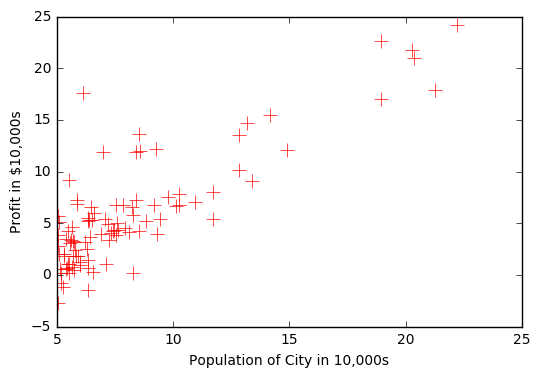

In [6]:
X = data1[:,0]
y = data1[:,1][:,None]
m = len(y)
plotData(X,y)

## Gradient descent

In [7]:
# add a column of ones to x
X = np.vstack((np.ones(m),data1[:,0])).T

# initialize fitting parameters
theta = np.zeros([2, 1])

# Some gradient descent settings
iterations = 10000
alpha = 0.01

# compute and display initial cost
computeCost(X, y, theta)

32.072733877455676

In [8]:
# run gradient descent
theta, J = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n {0:4.3f}, {1:4.3f}'.format(theta[0,0],theta[1,0]))

Theta found by gradient descent:
 -3.896, 1.193


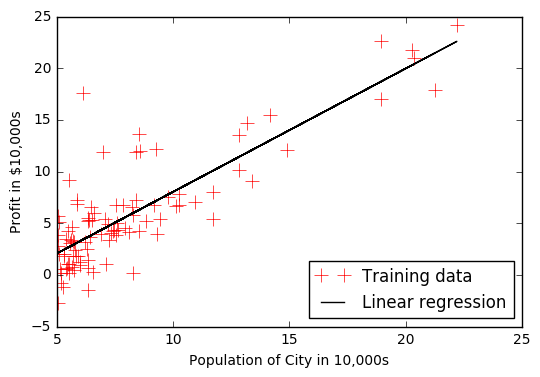

In [9]:
# Plot the linear fit
plotData(X[:,1],y)
plt.plot(X[:,1], X.dot(theta), '-k',label='Linear regression')
plt.legend(loc='lower right');

In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print('For population = 35,000, we predict a profit of',predict1[0]*10000)
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of',predict2[0]*10000)

For population = 35,000, we predict a profit of 2798.36913986
For population = 70,000, we predict a profit of 44554.5464824


## Visualizing J(theta_0, theta_1)

In [11]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.vstack([theta0_vals[i], theta1_vals[j]]) 
        J_vals[i,j] = computeCost(X, y, t)
    

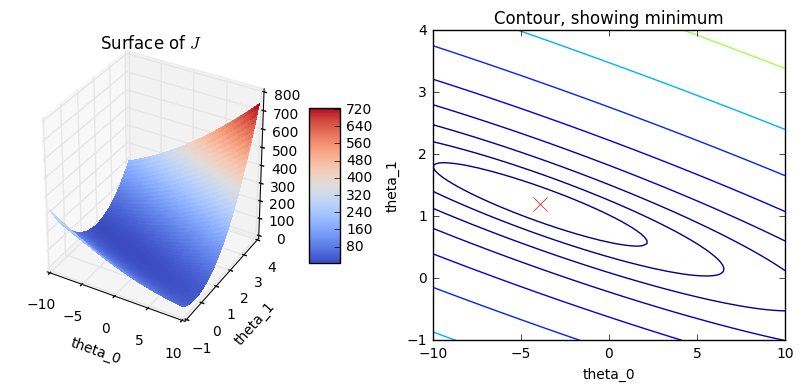

In [12]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1,projection='3d')

X1, Y1 = np.meshgrid(theta0_vals,theta1_vals)

surf = ax1.plot_surface(X1, Y1, J_vals.T, rstride=2, cstride=2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax1.set_xlabel('theta_0')
ax1.set_ylabel('theta_1')
ax1.set_title('Surface of $J$')

ax2 = fig.add_subplot(1,2,2)
ax2.contour(theta0_vals,theta1_vals,J_vals.T,levels=np.logspace(-2,3,20))
ax2.set_xlabel('theta_0')
ax2.set_ylabel('theta_1')
ax2.plot(theta[0], theta[1], 'rx', markersize=10, linewidth= 2)
ax2.set_title('Contour, showing minimum');

#  Linear regression with multiple variables

In this part, I will implement linear regression with multiple variables to
predict the prices of houses.

In [13]:
%matplotlib inline
import module
from module import *
from importlib import reload

In [14]:
reload(module=module)

<module 'module' from '/home/ofialko/Documents/MLSP/1_Linear_Regression/module.py'>

In [15]:
# loading data
data2 = np.loadtxt('data2.txt',delimiter=',')

X=data2[:,[0,1]]
y = data2[:,2][:,None]

In [16]:
# Normalizing features
X_norm, mu,sigma = featureNormalize(X)

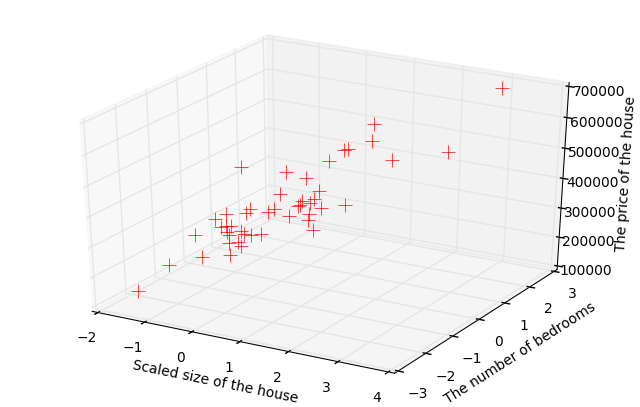

In [17]:
# visualization
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(X_norm[:,0],X_norm[:,1],y[:,0],'r+',markersize=10)
ax.set_xlabel('Scaled size of the house')
ax.set_ylabel('The number of bedrooms')
ax.set_zlabel('The price of the house');

## Gradient descent

In [18]:
# add a column of ones to x
m = len(y)
X2 = np.vstack((np.ones(m),X_norm.T)).T

# initialize fitting parameters
theta = np.zeros([3, 1])

# Some gradient descent settings
iterations = 10000
alpha = 0.1

# compute and display initial cost
computeCost(X2, y, theta)

65591548106.457443

In [19]:
theta, J = gradientDescent(X2, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n {0:4.3f}, {1:4.3f}, {2:4.3f}'.format(theta[0,0],theta[1,0],theta[2,0]))

Theta found by gradient descent:
 340412.660, 109447.796, -6578.355


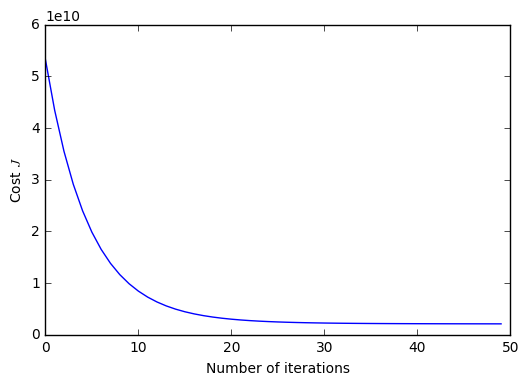

In [20]:
# Plotting cost function
plt.plot(range(50),J[:50],'b')
plt.ylabel('Cost $J$')
plt.xlabel('Number of iterations');

## Normal equation

$$\theta=(X^{T}X)^{-1}X^Ty$$

In [21]:
theta_n = np.linalg.inv(X2.T.dot(X2)).dot(X2.T.dot(y))
print('Theta found by Normal equation:\n {0:4.3f}, {1:4.3f}, {2:4.3f}'.format(theta_n[0,0],theta_n[1,0],theta_n[2,0]))

Theta found by Normal equation:
 340412.660, 109447.796, -6578.355
